In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#Since Name coloumn cannot have any relation with Survived passengers.
train.drop(columns=['Name'],inplace=True)

<AxesSubplot:xlabel='Sex', ylabel='count'>

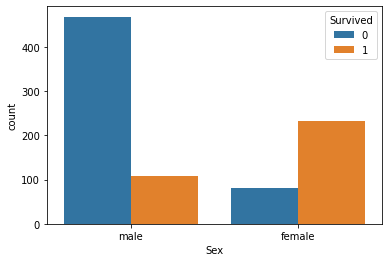

In [6]:
#Since Sex column is basically a categorical column(Male, Female).
#To visualise i am looking for the realtionship between Sex and Survived.
sns.countplot(data=train,x='Sex', hue='Survived')

In [7]:
#from the above graph we can see the relation between Sex and Survived .
# Whereas females are likely to survive more than any male passengers.
#Now since Sex column is a categorical data we need to convert into 0,1 for female and male respectively. f
#For this i will used label encoding method
label_encoder = LabelEncoder()
train['Sex'] = label_encoder.fit_transform(train['Sex'])

In [8]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,1,26.0,0,0,111369,30.0000,C148,C


In [9]:
#for finding linear relationship between columns i will now use corr() corealtion function.
train.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,0.042939,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000


In [10]:
#since cabin column have 204 entities so we are dropping it.
train.drop(columns=['Cabin'],inplace=True)

In [11]:
train.drop(columns=['PassengerId'],inplace=True)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [13]:
train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

<AxesSubplot:xlabel='Embarked', ylabel='count'>

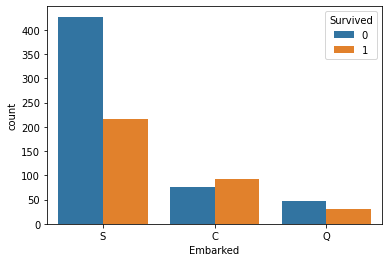

In [14]:
sns.countplot(data=train,x='Embarked', hue='Survived')

In [15]:
#The Ticket of the passenger has nothing to do with the survival rate.
train.drop(columns=['Ticket'],inplace=True)

In [16]:
#SibSp and Parch both represent the same thing, i.e, the family size of the passenger.Since the family size had any effect on the survival chances of the passengers.
train.drop(columns = ["SibSp","Parch"],inplace =True)

In [17]:
train.describe()

,Survived,Pclass,Sex,Age,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,32.204208
std,0.486592,0.836071,0.477990,14.526497,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,7.910400
50%,0.000000,3.000000,1.000000,28.000000,14.454200
75%,1.000000,3.000000,1.000000,38.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,512.329200


<AxesSubplot:xlabel='Survived', ylabel='count'>

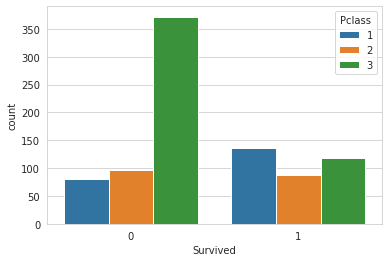

In [18]:
#let see the relation between Pclass and Survived
sns.set_style("whitegrid")
sns.countplot(x = "Survived", hue = "Pclass", data = train)

In [19]:
#It is clear that first class have higher survival rate than 3rd class passengers.

In [20]:
#filling the mean values in age column
train['Age'].mean()
train["Age"].fillna(29, inplace = True)

In [21]:
train['Age'].describe()

count    891.000000
mean      29.560236
std       13.005010
min        0.420000
25%       22.000000
50%       29.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [22]:
#fare vs Survival rate
train['Fare'].max()

512.3292

In [23]:
train['Fare'].min()

0.0

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

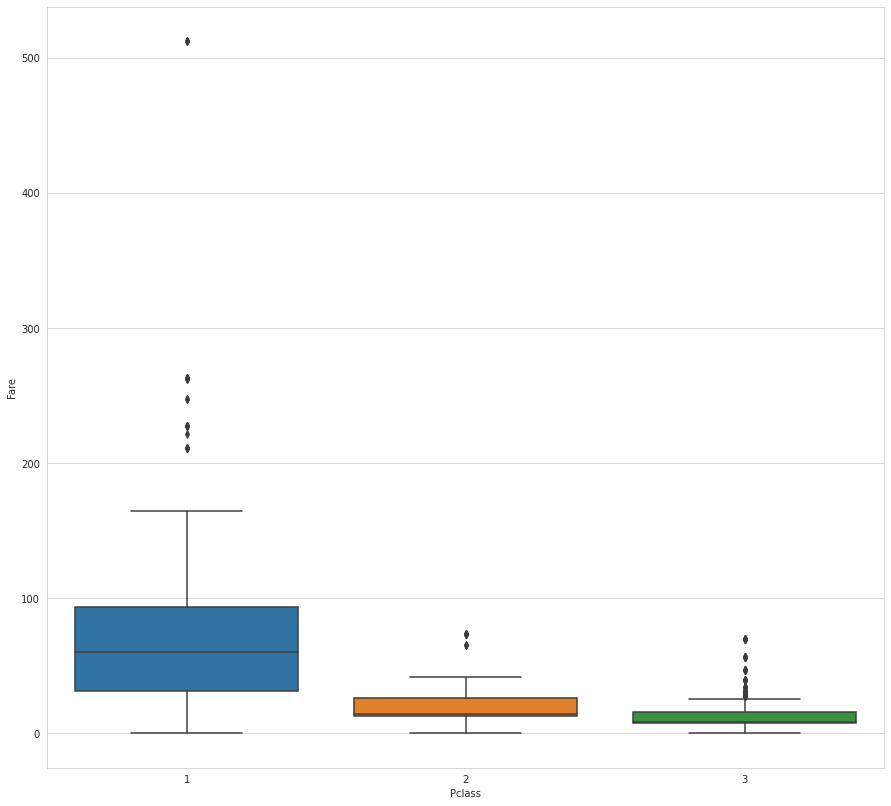

In [24]:
plt.figure(figsize=(15,14))
sns.boxplot(data=train, x='Pclass', y='Fare')

In [25]:
# The average money spent on the ticket was more for the passengers that survived.

In [27]:
train

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,1,22.0,7.2500,S
1,1,1,0,38.0,71.2833,C
2,1,3,0,26.0,7.9250,S
3,1,1,0,35.0,53.1000,S
4,0,3,1,35.0,8.0500,S
...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,S
887,1,1,0,19.0,30.0000,S
888,0,3,0,29.0,23.4500,S
889,1,1,1,26.0,30.0000,C


In [28]:
#Storing our data in variables
# The data from Kaggle is available in .csv files, we store that data into variables.
X = train[["Pclass","Sex","Age","Fare"]]
Y = train["Survived"]
X_TEST = test[["Pclass","Sex","Age","Fare"]]

In [31]:
# Standardisation of the Data
sc = StandardScaler()
X = sc.fit_transform(X)
X_TEST['Sex'] = label_encoder.fit_transform(X_TEST['Sex'])
X_TEST =  sc.transform(X_TEST)

/home/sandeepmishra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [32]:
train

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,1,22.0,7.2500,S
1,1,1,0,38.0,71.2833,C
2,1,3,0,26.0,7.9250,S
3,1,1,0,35.0,53.1000,S
4,0,3,1,35.0,8.0500,S
...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,S
887,1,1,0,19.0,30.0000,S
888,0,3,0,29.0,23.4500,S
889,1,1,1,26.0,30.0000,C


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state=1)

In [64]:
# LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score  # Import accuracy_score

# Create and fit the logistic regression model
regr = LogisticRegression(solver='liblinear', random_state=1)
regr.fit(X_train, y_train)

# Make predictions on the test data
yhat = regr.predict(X_test)

# Calculate and print the accuracy for the test data
LR_accuracy = accuracy_score(y_test, yhat)
print("Accuracy for test data:", LR_accuracy)


Accuracy for test data: 0.8044692737430168


In [68]:
from sklearn.tree import DecisionTreeClassifier

depth = [];

for i in range(1,8):
    clf_tree = DecisionTreeClassifier(criterion="entropy", random_state = 100, max_depth = i)
    clf_tree.fit(X_train,y_train)
    yhat = clf_tree.predict(X_test)
    depth.append(accuracy_score(y_test,yhat))
    print("For max depth = ",i, " : ",accuracy_score(y_test,yhat))

For max depth =  1  :  0.776536312849162
For max depth =  2  :  0.7206703910614525
For max depth =  3  :  0.8044692737430168
For max depth =  4  :  0.8044692737430168
For max depth =  5  :  0.8100558659217877
For max depth =  6  :  0.7932960893854749
For max depth =  7  :  0.776536312849162


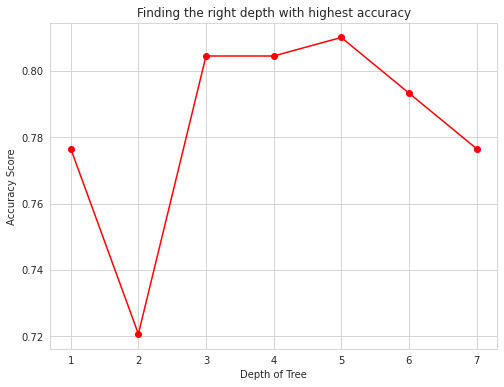

In [38]:
plt.figure(figsize=(8,6))
plt.plot(range(1,8),depth,color="red", marker = "o")
plt.xlabel("Depth of Tree")
plt.ylabel("Accuracy Score")
plt.title("Finding the right depth with highest accuracy")
plt.xticks(range(1,8))
plt.show()

In [39]:
# Highest accuracy is obtained with depth = 5.

In [86]:
clf_tree = DecisionTreeClassifier(criterion="entropy", random_state = 100, max_depth = 5)
clf_tree.fit(X_train,y_train)
yhat = clf_tree.predict(X_test)
depth.append(accuracy_score(y_test,yhat))
TREE_accuracy =accuracy_score(y_test,yhat)

print("For max depth = ",5, " : ",accuracy_score(y_test,yhat))


For max depth =  5  :  0.8100558659217877


In [66]:
#### RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

clf_forest = RandomForestClassifier(random_state=0)
clf_forest.fit(X_train,y_train)
yhat = clf_forest.predict(X_test)
print("Accuracy for training data : ",accuracy_score(y_test,yhat))
FOREST_accuracy = accuracy_score(y_test, yhat)

Accuracy for training data :  0.7988826815642458


In [67]:
#SUPPORT VECTOR MACHINE
from sklearn.svm import SVC
clf_svm = SVC(gamma='auto')
clf_svm.fit(X_train,y_train)
yhat = clf_svm.predict(X_test)
print("Accuracy for training data : ",accuracy_score(y_test,yhat))
SVM_accuracy = accuracy_score(y_test, yhat)

Accuracy for training data :  0.770949720670391


In [75]:
from sklearn.neighbors import KNeighborsClassifier

Z = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    yhat = knn.predict(X_test)
    Z.append(accuracy_score(y_test,yhat))
    print("For k = ",i," : ",accuracy_score(y_test,yhat))
KNN_accuracy = accuracy_score(y_test, yhat)
    

For k =  1  :  0.7597765363128491
For k =  2  :  0.7597765363128491
For k =  3  :  0.7821229050279329
For k =  4  :  0.7597765363128491
For k =  5  :  0.7541899441340782
For k =  6  :  0.770949720670391
For k =  7  :  0.7653631284916201
For k =  8  :  0.7541899441340782
For k =  9  :  0.776536312849162
For k =  10  :  0.7653631284916201
For k =  11  :  0.7653631284916201
For k =  12  :  0.7597765363128491
For k =  13  :  0.7821229050279329
For k =  14  :  0.7653631284916201
For k =  15  :  0.770949720670391
For k =  16  :  0.7653631284916201
For k =  17  :  0.770949720670391
For k =  18  :  0.7653631284916201
For k =  19  :  0.7821229050279329


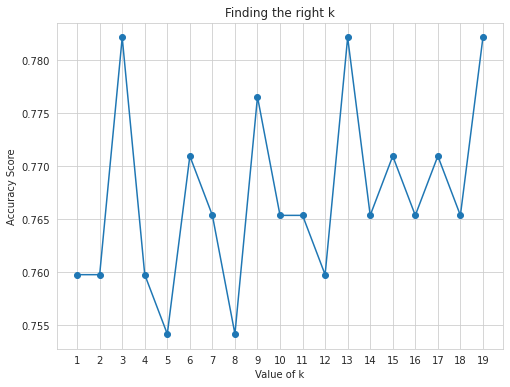

In [53]:
plt.figure(figsize=(8,6))
plt.plot(range(1,20),Z, marker = "o")
plt.xlabel("Value of k")
plt.ylabel("Accuracy Score")
plt.title("Finding the right k")
plt.xticks(range(1,20))
plt.show()

In [70]:
print("Accuracy for training data at k = ",3," : ",accuracy_score(y_test,yhat))

Accuracy for training data at k =  3  :  0.7821229050279329


In [78]:
from sklearn.naive_bayes import GaussianNB

clf_NB = GaussianNB()
clf_NB.fit(X_train, y_train)
y_hat = clf_NB.predict(X_test)

# Calculate and print the accuracy for the test data
NB_accuracy = accuracy_score(y_test, y_hat)
print("Accuracy for training data:", NB_accuracy)


Accuracy for training data: 0.7653631284916201


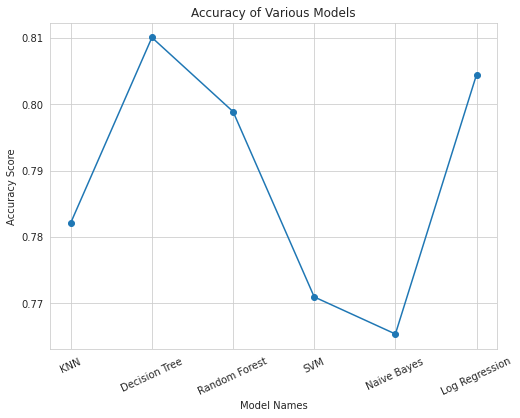

In [87]:
#FINAL RESULT
# Define the accuracy scores for each model (replace with actual values)
accuracy_scores = [KNN_accuracy, TREE_accuracy, FOREST_accuracy, SVM_accuracy, NB_accuracy, LR_accuracy]

# Define the model names
model_names = ['KNN', 'Decision Tree', 'Random Forest', 'SVM', 'Naive Bayes', 'Log Regression']

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 7), accuracy_scores, marker='o')
plt.xticks(range(1, 7), model_names, rotation=25)
plt.title('Accuracy of Various Models')
plt.xlabel('Model Names')
plt.ylabel("Accuracy Score")
plt.show()
